In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/vgsales.csv', sep=',') 
df = df.drop(columns=['Publisher'])

In [26]:
df.head()

,Name,Type,Genre
0,Wii Sports,Wii,Sports
1,Super Mario Bros.,NES,Platform
2,Mario Kart Wii,Wii,Racing
3,Wii Sports Resort,Wii,Sports
4,Pokemon Red/Pokemon Blue,GB,Role-Playing


In [27]:
df.tail()

,Name,Type,Genre
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform
16594,Men in Black II: Alien Escape,GC,Shooter
16595,SCORE International Baja 1000: The Official Game,PS2,Racing
16596,Know How 2,DS,Puzzle
16597,Spirits & Spells,GBA,Platform


In [28]:
df.isna().sum()

Name     0
Type     0
Genre    0
dtype: int64

In [29]:
df.dropna(inplace=True)

df = df[df['Type'] != 'PS2']

df['Publisher'] = np.where(df['Type'] > 'PS2',1,0)
df.head(10)

,Name,Type,Genre,Publisher
0,Wii Sports,Wii,Sports,1
1,Super Mario Bros.,NES,Platform,0
2,Mario Kart Wii,Wii,Racing,1
3,Wii Sports Resort,Wii,Sports,1
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,0
5,Tetris,GB,Puzzle,0
6,New Super Mario Bros.,DS,Platform,0
7,Wii Play,Wii,Misc,1
8,New Super Mario Bros. Wii,Wii,Platform,1
9,Duck Hunt,NES,Shooter,0


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Name'], 
                                                    df['Genre'], 
                                                    random_state=0)

In [31]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Saints Row 2


X_train shape:  (10827,)


In [32]:
from sklearn.feature_extraction.text import CountVectorizer


vect = CountVectorizer().fit(X_train)

In [33]:
vect.get_feature_names()[::2000]

['00', 'exe', 'mega', 'spirits']

In [34]:
len(vect.get_feature_names())

7244

In [35]:
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<10827x7244 sparse matrix of type '<class 'numpy.int64'>'
	with 40162 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
feature_names = np.array(vect.get_feature_names())
 
 
sorted_coef_index = model.coef_[0].argsort()
 
 
print('koefisien terkecil:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('koefisien terbesar: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

koefisien terkecil:
['swap' 'road' 'london' 'fighters' 'series' 'cabela' 'cup' 'shodown'
 'brain' 'pac']

koefisien terbesar: 
['warriors' 'batman' 'lego' 'darksiders' 'transformers' 'terraria' '2k11'
 'skylanders' 'zelda' 'ratatouille']


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=1).fit(X_train)
len(vect.get_feature_names())

7244

In [39]:
feature_names = np.array(vect.get_feature_names())
 
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
 
print('tfidf terkecil:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('tfidf terbesar: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

tfidf terkecil:
['00' 'pipe' 'pinobee' 'pino' 'pinkie' 'pink' 'ping' 'pinbusters'
 'pinball' 'pinata']

tfidf terbesar: 
['the' 'kata' 'to' 'go' 'tank' 'nine' 'kong' 'gundam' 'no' 'masu']


In [40]:
sorted_coef_index = model.coef_[0].argsort()
 
print('koefisien terkecil:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('koefisien terbesar: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

koefisien terkecil:
['swap' 'road' 'london' 'fighters' 'series' 'cabela' 'cup' 'shodown'
 'brain' 'pac']

koefisien terbesar: 
['warriors' 'batman' 'lego' 'darksiders' 'transformers' 'terraria' '2k11'
 'skylanders' 'zelda' 'ratatouille']


In [41]:
print(model.predict(vect.transform(['autosport is european wars',
                                    'skylander is not european wars'])))

['Action' 'Action']


In [42]:
vect = CountVectorizer(min_df=2, ngram_range=(1,3)).fit(X_train)
 
X_train_vectorized = vect.transform(X_train)
 
len(vect.get_feature_names())

11746

In [43]:
feature_names = np.array(vect.get_feature_names())
 
sorted_coef_index = model.coef_[0].argsort()
 
print('koefisien terkecil:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('koefisien terbesar: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

koefisien terkecil:
['museum 50th anniversary' 'legacy of kain' 'goblin commander' 'damage'
 'man' 'battle for' 'bureau xcom' 'mass effect trilogy'
 'ball raging blast' 'it']

koefisien terbesar: 
['of mana' 'arcade game' 'germany next' 'capture' 'ni kawaii'
 'national geographic' '20 04' 'memorial forever with' 'order of'
 'knights of the']


In [44]:
df.groupby('Genre').count()

,Name,Type,Publisher
Genre,,,
Action,2968,2968,2968
Adventure,1090,1090,1090
Fighting,698,698,698
Misc,1517,1517,1517
Platform,783,783,783
Puzzle,564,564,564
Racing,1033,1033,1033
Role-Playing,1301,1301,1301
Shooter,1150,1150,1150


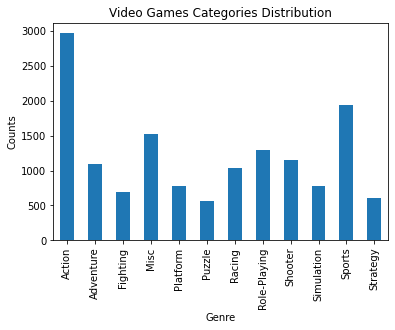

In [45]:
import matplotlib.pyplot as plt
 
%matplotlib inline
 
df.groupby('Genre').Genre.count().plot.bar()
plt.title("Video Games Categories Distribution")
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [46]:
df[df['Genre'] == 'Action'].head(10)

,Name,Type,Genre,Publisher
16,Grand Theft Auto V,PS3,Action,1
23,Grand Theft Auto V,X360,Action,1
44,Grand Theft Auto V,PS4,Action,1
45,Pokemon HeartGold/Pokemon SoulSilver,DS,Action,0
51,Grand Theft Auto IV,X360,Action,1
56,Grand Theft Auto IV,PS3,Action,1
82,FIFA Soccer 13,PS3,Action,1
90,Grand Theft Auto: Liberty City Stories,PSP,Action,1
94,The Legend of Zelda: Ocarina of Time,N64,Action,0
100,The Legend of Zelda: Twilight Princess,Wii,Action,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14437 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       14437 non-null  object
 1   Type       14437 non-null  object
 2   Genre      14437 non-null  object
 3   Publisher  14437 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 563.9+ KB


In [48]:
category = pd.get_dummies(df.Genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Genre')
df_baru

,Name,Type,Publisher,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,Wii,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,NES,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,Wii,1,0,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,Wii,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,GB,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16592,Plushees,DS,0,0,0,0,0,0,0,0,0,0,1,0,0
16593,Woody Woodpecker in Crazy Castle 5,GBA,0,0,0,0,0,1,0,0,0,0,0,0,0
16594,Men in Black II: Alien Escape,GC,0,0,0,0,0,0,0,0,0,1,0,0,0
16596,Know How 2,DS,0,0,0,0,0,0,1,0,0,0,0,0,0


In [49]:
dataset = df_baru.values
dataset

array([['Wii Sports', 'Wii', 1, ..., 0, 1, 0],
       ['Super Mario Bros.', 'NES', 0, ..., 0, 0, 0],
       ['Mario Kart Wii', 'Wii', 1, ..., 0, 0, 0],
       ...,
       ['Men in Black II: Alien Escape', 'GC', 0, ..., 0, 0, 0],
       ['Know How 2', 'DS', 0, ..., 0, 0, 0],
       ['Spirits & Spells', 'GBA', 0, ..., 0, 0, 0]], dtype=object)

In [50]:
Nama = df_baru['Name'].values
genre = df_baru[['Action','Adventure','Fighting','Misc','Platform','Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation','Sports','Strategy']].values

In [51]:
print(df_baru[['Action','Adventure','Fighting','Misc','Platform','Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation','Sports','Strategy']])

       Action  Adventure  Fighting  Misc  ...  Shooter  Simulation  Sports  Strategy
0           0          0         0     0  ...        0           0       1         0
1           0          0         0     0  ...        0           0       0         0
2           0          0         0     0  ...        0           0       0         0
3           0          0         0     0  ...        0           0       1         0
4           0          0         0     0  ...        0           0       0         0
...       ...        ...       ...   ...  ...      ...         ...     ...       ...
16592       0          0         0     0  ...        0           1       0         0
16593       0          0         0     0  ...        0           0       0         0
16594       0          0         0     0  ...        1           0       0         0
16596       0          0         0     0  ...        0           0       0         0
16597       0          0         0     0  ...        0           

In [52]:
from sklearn.model_selection import train_test_split
Nama_latih, Nama_test, genre_latih, genre_test = train_test_split(Nama, genre, test_size=0.2)

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(Nama_latih) 
tokenizer.fit_on_texts(Nama_test)
 
sekuens_latih = tokenizer.texts_to_sequences(Nama_latih)
sekuens_test = tokenizer.texts_to_sequences(Nama_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [54]:
print(Nama_latih[2])
print(sekuens_latih[2])

The Adventures of Tintin: The Game
[2, 58, 3, 2120, 2, 8]


In [55]:
print(tokenizer.word_index)

{'-': 1, 'the': 2, 'of': 3, '2': 4, 'no': 5, '3': 6, 'world': 7, 'game': 8, 'super': 9, 'ii': 10, 'pro': 11, 'to': 12, 'star': 13, 'and': 14, 'ds': 15, 'a': 16, 'wars': 17, '4': 18, 'dragon': 19, 'in': 20, 'soccer': 21, 'man': 22, 'for': 23, 'battle': 24, 'lego': 25, 'nba': 26, 'heroes': 27, 'party': 28, 'nfl': 29, 'vs': 30, 'collection': 31, 'edition': 32, 'adventure': 33, 'x': 34, 'ultimate': 35, 'portable': 36, 'fifa': 37, 'dance': 38, 'racing': 39, 'war': 40, 'warriors': 41, '1': 42, 'sales': 43, 'mario': 44, 'dead': 45, 'legend': 46, '5': 47, 'iii': 48, 'force': 49, 'league': 50, 'championship': 51, 'tour': 52, 'ninja': 53, 'quest': 54, 'baseball': 55, 'challenge': 56, 'final': 57, 'adventures': 58, 'street': 59, 'all': 60, 'series': 61, 'fantasy': 62, 'sports': 63, 'dark': 64, 'evolution': 65, 'monster': 66, 'games': 67, 'nhl': 68, 'pack': 69, 'king': 70, 'gundam': 71, 'ball': 72, 'madden': 73, 'power': 74, 'speed': 75, 'time': 76, 'hero': 77, 'tom': 78, 'de': 79, 'rock': 80, 'fo

In [56]:
for word in ['the', 'all', 'happy', 'world','game','super']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 2
all: 60
happy: 542
world: 7
game: 8
super: 9


In [57]:
print(sekuens_latih)

[[73, 29, 367], [1790, 3316], [2, 58, 3, 2120, 2, 8], [4722], [2, 485], [91, 17, 576, 3, 2577], [177, 4723, 4724, 846], [45, 434, 6], [3317, 435, 3318, 281], [262, 56], [2578, 4725], [4726, 53], [847, 691], [182, 436, 600, 1791], [2579, 2121], [2, 437, 3319], [2580, 3320, 4727, 788, 36], [355, 601, 58, 1028, 848], [84, 692, 2581, 2122, 33, 2123, 12, 437], [2582], [1395, 3, 486, 36], [2124, 390, 8, 2125, 328, 438, 161, 34, 4728, 5, 4729], [2126, 1792, 4730, 4731], [1029, 461, 2583], [2584, 3321, 2, 391, 3, 3322, 2585], [2586, 3323, 789, 241, 2587], [315, 638, 1128], [4732, 7], [2588, 2589], [288, 6, 2590, 1251], [37, 21, 316], [101, 282, 602, 7, 136], [849, 850, 162, 851, 34], [2, 1396, 6, 214, 603], [2127, 515, 64, 381], [4733, 5, 2128, 1030, 4734], [604, 2, 435, 3, 308], [1397, 1567, 5, 2591], [162, 2592], [852, 30, 693], [931], [462, 1398, 214, 7], [2129, 28, 137, 3324, 3325, 1031], [3326], [73, 29, 367], [37, 415], [152, 57, 790, 368], [2130, 59, 4, 2131, 2132, 694, 2593, 2133, 117]

In [58]:
print(sekuens_test)

[[151, 193, 2, 146], [3098, 209, 708, 85], [92, 63, 21], [95, 3, 130, 460, 292, 237], [1, 5, 475, 1, 5, 1860], [134, 82, 18], [274, 335, 1370, 2076, 2493], [2096, 79, 164, 4], [2571, 76, 12, 1], [245, 30, 636], [1, 65, 1423], [470, 1291, 489, 1706], [660, 319], [4577, 2, 2866], [915, 123, 4], [787, 23, 1017], [856, 742, 2619, 2, 531, 4590], [228, 768, 769, 829], [1459, 279, 670], [553, 160, 48], [27, 3, 1336, 14, 297, 159], [162, 364], [3361, 1821, 3362, 361, 69], [95, 3, 130, 460, 292, 6], [286, 139, 6], [370, 3258], [2096, 79, 164, 4670, 477, 1, 4670, 300], [35, 146], [2674, 415], [4467, 1567, 1244, 42, 47], [64, 456, 10], [2541, 51, 675], [29, 1552, 190], [122, 1537, 4], [1218, 6, 954, 573], [1305, 338, 20, 522], [1, 1], [286, 139, 210], [2, 1248, 3, 472, 556, 2535, 640, 1243], [2, 279, 1954], [53, 582, 6], [538, 539, 679], [975, 1645, 4671, 14, 916], [4507, 12, 4508, 5, 932, 5, 630], [2553, 2554, 892, 1121, 2555, 2020, 1727, 1286, 1, 1, 1, 5, 2556, 1, 1121, 2490], [92, 321, 6, 362]

In [59]:
print(padded_latih)

[[   0    0    0 ...   73   29  367]
 [   0    0    0 ...    0 1790 3316]
 [   0    0    0 ... 2120    2    8]
 ...
 [   0    0    0 ...    0    1   77]
 [   0    0    0 ...   26   59 4669]
 [   0    0    0 ...    4 3797  510]]


In [60]:
print(padded_test)

[[   0    0    0 ...  193    2  146]
 [   0    0    0 ...  209  708   85]
 [   0    0    0 ...   92   63   21]
 ...
 [   0    0    0 ...   53  356 1242]
 [   0    0    0 ...  281  747 2637]
 [   0    0    0 ...    0   81  466]]


In [61]:
# Contoh Vektor
contoh  =[Nama[0],Nama[1],Nama[2],Nama[3]] # Wii Sports [0],Super Mario Bros.[1],Mario Kart Wii[3],Wii Sports Resort[4]

In [62]:
from sklearn.feature_extraction.text import CountVectorizer # CountVectorizer yang disediakan oleh scikit-learn library untuk membuat vektor kalimat.
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(contoh)
vectorizer.vocabulary_

{'Bros': 0,
 'Kart': 1,
 'Mario': 2,
 'Resort': 3,
 'Sports': 4,
 'Super': 5,
 'Wii': 6}

In [63]:
vectorizer.transform(contoh).toarray()

array([[0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 1]])

In [64]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=50),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [65]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [67]:
num_epochs = 50
history = model.fit(padded_latih, genre_latih, epochs=num_epochs, batch_size=128, validation_data=(padded_test, genre_test),verbose=2, callbacks=[callbacks])

Epoch 1/50
91/91 - 1s - loss: 2.3906 - accuracy: 0.1906 - val_loss: 2.3087 - val_accuracy: 0.2091
Epoch 2/50
91/91 - 1s - loss: 2.0855 - accuracy: 0.2856 - val_loss: 1.7879 - val_accuracy: 0.4051
Epoch 3/50
91/91 - 1s - loss: 1.6061 - accuracy: 0.4533 - val_loss: 1.4653 - val_accuracy: 0.5450
Epoch 4/50
91/91 - 1s - loss: 1.2083 - accuracy: 0.6036 - val_loss: 1.2621 - val_accuracy: 0.6222
Epoch 5/50
91/91 - 1s - loss: 0.9492 - accuracy: 0.7065 - val_loss: 1.1963 - val_accuracy: 0.6655
Epoch 6/50
91/91 - 1s - loss: 0.7973 - accuracy: 0.7616 - val_loss: 1.1853 - val_accuracy: 0.6849
Epoch 7/50
91/91 - 1s - loss: 0.6976 - accuracy: 0.7915 - val_loss: 1.2447 - val_accuracy: 0.6953
Epoch 8/50
91/91 - 1s - loss: 0.6174 - accuracy: 0.8183 - val_loss: 1.2554 - val_accuracy: 0.7022
Epoch 9/50
91/91 - 1s - loss: 0.5701 - accuracy: 0.8338 - val_loss: 1.2506 - val_accuracy: 0.7102
Epoch 10/50
91/91 - 1s - loss: 0.5202 - accuracy: 0.8467 - val_loss: 1.3406 - val_accuracy: 0.7046
Epoch 11/50
91/91 -

In [68]:
model.evaluate(padded_latih, genre_latih)

361/361 [==============================] - 1s 3ms/step - loss: 0.2432 - accuracy: 0.9207


[0.2432081401348114, 0.9206857681274414]

In [69]:
model.evaluate(padded_test, genre_test)

91/91 [==============================] - 0s 3ms/step - loss: 1.7153 - accuracy: 0.7209


[1.7153323888778687, 0.7209141254425049]

In [77]:
model.predict(padded_latih[1])

array([[1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171862e-02, 6.1490342e-02],
       [1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171862e-02, 6.1490342e-02],
       [1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171862e-02, 6.1490342e-02],
       [1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171862e-02, 6.1490342e-02],
       [1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171

In [71]:
model.predict(padded_test[1])

array([[1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171862e-02, 6.1490342e-02],
       [1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171862e-02, 6.1490342e-02],
       [1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171862e-02, 6.1490342e-02],
       [1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171862e-02, 6.1490342e-02],
       [1.5860321e-01, 9.2937909e-02, 5.5772666e-02, 6.4663537e-02,
        1.1408985e-01, 9.3692273e-02, 7.6767050e-02, 7.7267803e-02,
        1.0558005e-01, 6.7963421e-02, 3.1171

In [72]:
model.predict(genre_latih[1])

array([[0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186, 0.06149034],
       [0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186, 0.06149034],
       [0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186, 0.06149034],
       [0.12159895, 0.12274446, 0.07075342, 0.09122815, 0.06838817,
        0.08975726, 0.06233108, 0.1040355 , 0.06748501, 0.08677874,
        0.04404064, 0.07085857],
       [0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186, 0.06149034],
       [0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186,

In [73]:
model.predict(genre_test[1])

array([[0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186, 0.06149034],
       [0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186, 0.06149034],
       [0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186, 0.06149034],
       [0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186, 0.06149034],
       [0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186, 0.06149034],
       [0.15860322, 0.09293792, 0.05577267, 0.06466352, 0.11408985,
        0.09369227, 0.07676706, 0.0772678 , 0.10558005, 0.06796343,
        0.03117186,

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


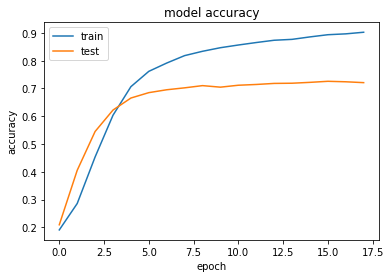

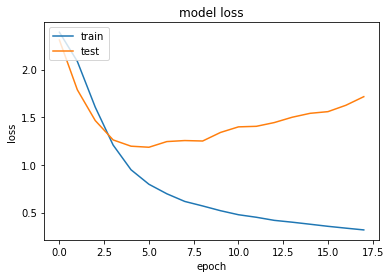

In [74]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
 
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()